In [1]:
import tensorflow as tf


In [2]:
from tensorflow import keras

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib.pyplot as plt

In [5]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [6]:
fashion_data = keras.datasets.fashion_mnist.load_data()
fashion_data

4422102/4422102 [==============================] - 20s 5us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [7]:
(x_train,y_train),(x_test,y_test) = fashion_data

In [8]:
item_names = ['T-Shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [9]:
# Reshape the date
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))
x_train.shape
x_test.shape

(10000, 28, 28, 1)

In [10]:
#normalize the data
x_train_norm = x_train/225
x_test_norm = x_test/225

In [11]:
# Date splitting for training, testing and validation
x_val, x_train_n = x_train_norm[:5000], x_train_norm[5000:]
y_val, y_train_n = y_train[:5000], y_train[5000:]
x_test_n = x_test_norm

In [12]:
# Random Seed
tf.random.set_seed(42)

# Model Architecture
model = keras.models.Sequential()

# Building a Model
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding='valid', activation='relu', input_shape=(28, 28, 1)))

model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 300)               1622700   
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                        

Epoch 1/5
860/860 [==============================] - 13s 15ms/step - loss: 0.8218 - accuracy: 0.7162 - val_loss: 0.7091 - val_accuracy: 0.7392
Epoch 2/5
860/860 [==============================] - 13s 15ms/step - loss: 0.5262 - accuracy: 0.8098 - val_loss: 0.4818 - val_accuracy: 0.8192
Epoch 3/5
860/860 [==============================] - 13s 15ms/step - loss: 0.4690 - accuracy: 0.8295 - val_loss: 0.8783 - val_accuracy: 0.7116
Epoch 4/5
860/860 [==============================] - 13s 15ms/step - loss: 0.4328 - accuracy: 0.8450 - val_loss: 0.4046 - val_accuracy: 0.8564
Epoch 5/5
860/860 [==============================] - 13s 15ms/step - loss: 0.4088 - accuracy: 0.8531 - val_loss: 0.3996 - val_accuracy: 0.8578


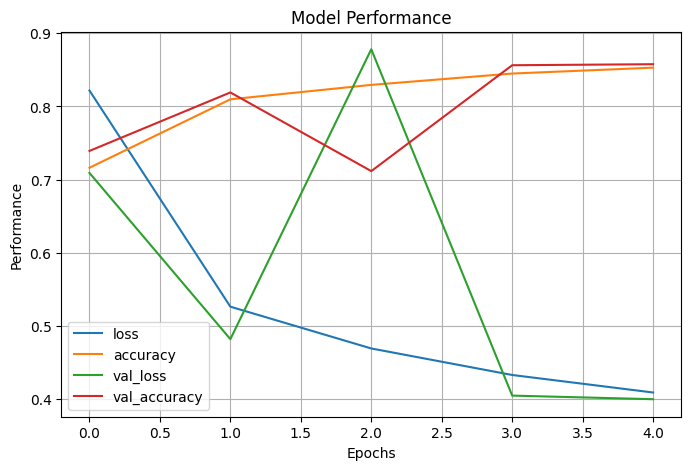

In [13]:
# Copiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

# Fitting Values to Model
model_fit = model.fit(x_train_n, y_train_n, epochs=5, batch_size=64, validation_data=(x_val, y_val))

# Model Performance Visualization
pd.DataFrame(model_fit.history).plot(figsize=(8, 5))
plt.title('Model Performance')
plt.xlabel("Epochs")
plt.ylabel('Performance')
plt.grid(True)
plt.show()

313/313 [==============================] - 1s 3ms/step - loss: 0.4374 - accuracy: 0.8429

 Model Evaluaton Score :  [0.43739375472068787, 0.8428999781608582]
313/313 [==============================] - 1s 3ms/step

 y_pred output :  [9 2 1 ... 8 1 5]

 Predicted Class :  [9 2 1]

 Predicted Class in Labels :  ['Ankle boot' 'Pullover' 'Trouser']

 Confusion Matrix :  [[733  19  22  68  23   0 119   0  15   1]
 [  0 972   0  20   5   0   2   0   1   0]
 [  6   4 615  12 315   1  41   1   5   0]
 [  6  39   4 840  73   0  33   0   5   0]
 [  0   0  27  21 925   0  21   0   6   0]
 [  0   0   0   1   0 864   0  76   6  53]
 [104   5 108  47 343   0 369   0  24   0]
 [  0   0   0   0   0   7   0 954   1  38]
 [  0   1  13   8  10   1   9   6 952   0]
 [  0   0   0   0   0   3   0  44   1 952]]

 Accuracy Score :  0.8176


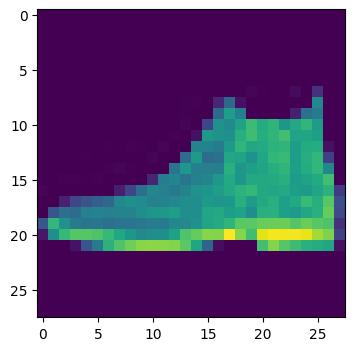

In [14]:
# Model Evaluation
score = model.evaluate(x_test_n, y_test)
print('\n Model Evaluaton Score : ', score)

# Prediction & class Object
y_pred = np.argmax(model.predict(x_test), axis=-1)
print('\n y_pred output : ', y_pred)

# Class & Lables of initial 3 data
print('\n Predicted Class : ',y_pred[:3])
print('\n Predicted Class in Labels : ', np.array(item_names)[y_pred[:3]])

# Predicted Output Visualization
plt.figure(figsize=(6, 4))
plt.imshow(x_test[0].reshape((28, 28)))

# Performance Metrics
# Confusion Matrix
print('\n Confusion Matrix : ', confusion_matrix(y_test, y_pred))

# Accuracy Score
print('\n Accuracy Score : ', accuracy_score(y_test, y_pred))